In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("online_food_delivery_dataset.csv")

In [3]:
df.head()

,Order_ID,Order_Date,City,Restaurant_Name,Cuisine_Type,Order_Amount,Discount_Applied,Discount_Amount,Final_Amount,Payment_Method,Delivery_Time_Minutes,Distance_km,Rider_Rating,Customer_Rating,Order_Status
0,ORD1,2026-02-22,Mumbai,Spice Hub,Italian,842.90,Yes,0.0,842.90,Card,107,6.32,4.4,3.8,Delivered
1,ORD2,2026-02-22,Pune,Curry Kingdom,Indian,974.79,Yes,50.0,924.79,UPI,101,2.68,4.7,3.8,Cancelled
2,ORD3,2026-02-22,Hyderabad,Sushi Spot,Chinese,1459.93,NaN,0.0,1459.93,Card,36,2.64,4.3,4.8,Cancelled
3,ORD4,2026-02-22,Chennai,Sushi Spot,Italian,151.44,Yes,100.0,51.44,Cash,74,6.32,3.3,3.6,Delivered
4,ORD5,2026-02-22,Delhi,Burger Town,Indian,949.10,Yes,0.0,949.10,Card,63,16.22,3.5,2.1,Delayed


# DATA EXPLORATION

In [4]:
df.shape

(2000, 15)

In [5]:
df.dtypes

Order_ID                  object
Order_Date                object
City                      object
Restaurant_Name           object
Cuisine_Type              object
Order_Amount             float64
Discount_Applied          object
Discount_Amount          float64
Final_Amount             float64
Payment_Method            object
Delivery_Time_Minutes      int64
Distance_km              float64
Rider_Rating             float64
Customer_Rating          float64
Order_Status              object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order_ID               2000 non-null   object 
 1   Order_Date             2000 non-null   object 
 2   City                   2000 non-null   object 
 3   Restaurant_Name        2000 non-null   object 
 4   Cuisine_Type           2000 non-null   object 
 5   Order_Amount           2000 non-null   float64
 6   Discount_Applied       1308 non-null   object 
 7   Discount_Amount        1602 non-null   float64
 8   Final_Amount           2000 non-null   float64
 9   Payment_Method         2000 non-null   object 
 10  Delivery_Time_Minutes  2000 non-null   int64  
 11  Distance_km            2000 non-null   float64
 12  Rider_Rating           2000 non-null   float64
 13  Customer_Rating        2000 non-null   float64
 14  Order_Status           2000 non-null   object 
dtypes: f

In [7]:
df.describe()

,Order_Amount,Discount_Amount,Final_Amount,Delivery_Time_Minutes,Distance_km,Rider_Rating,Customer_Rating
count,2000.000000,1602.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1085.763850,73.501873,1026.888850,66.860000,15.840255,3.773350,3.495650
std,528.008753,55.899071,532.206049,30.612889,8.490122,0.712277,0.870899
min,150.350000,0.000000,13.000000,15.000000,1.000000,2.500000,2.000000
25%,630.217500,0.000000,572.170000,39.000000,8.337500,3.200000,2.700000
50%,1092.000000,50.000000,1029.485000,67.000000,16.035000,3.800000,3.500000
75%,1542.392500,100.000000,1487.135000,94.000000,23.400000,4.400000,4.200000
max,1999.160000,150.000000,1999.160000,119.000000,29.990000,5.000000,5.000000


# DATA CLEANING

In [8]:
df.isnull().sum()

Order_ID                   0
Order_Date                 0
City                       0
Restaurant_Name            0
Cuisine_Type               0
Order_Amount               0
Discount_Applied         692
Discount_Amount          398
Final_Amount               0
Payment_Method             0
Delivery_Time_Minutes      0
Distance_km                0
Rider_Rating               0
Customer_Rating            0
Order_Status               0
dtype: int64

In [9]:
df["Discount_Applied"] = df["Discount_Applied"].fillna(df["Discount_Applied"].mode()[0])

In [10]:
print(df["Discount_Amount"].skew())

0.03352813227963141


In [11]:
df["Discount_Amount"] = df["Discount_Amount"].fillna(df["Discount_Amount"].mean())

In [12]:
df.isnull().sum()

Order_ID                 0
Order_Date               0
City                     0
Restaurant_Name          0
Cuisine_Type             0
Order_Amount             0
Discount_Applied         0
Discount_Amount          0
Final_Amount             0
Payment_Method           0
Delivery_Time_Minutes    0
Distance_km              0
Rider_Rating             0
Customer_Rating          0
Order_Status             0
dtype: int64

# DUPLICATE VALUE

In [13]:
print(df.duplicated().sum())

0


# OUTLIER ANALYSIS

### Using IQR method

### Using BOXPLOT

In [14]:
df1=df.select_dtypes(include=np.number)

In [15]:
df1

,Order_Amount,Discount_Amount,Final_Amount,Delivery_Time_Minutes,Distance_km,Rider_Rating,Customer_Rating
0,842.90,0.000000,842.90,107,6.32,4.4,3.8
1,974.79,50.000000,924.79,101,2.68,4.7,3.8
2,1459.93,0.000000,1459.93,36,2.64,4.3,4.8
3,151.44,100.000000,51.44,74,6.32,3.3,3.6
4,949.10,0.000000,949.10,63,16.22,3.5,2.1
...,...,...,...,...,...,...,...
1995,944.25,73.501873,944.25,45,5.85,3.0,4.0
1996,1000.04,73.501873,1000.04,27,1.00,4.9,4.4
1997,1822.37,100.000000,1722.37,114,17.08,4.6,3.4
1998,531.14,0.000000,531.14,26,16.60,2.9,3.5


In [16]:
for i in df1:
    q1=df1[i].quantile(0.25)
    q2=df1[i].quantile(0.50)
    q3=df1[i].quantile(0.75)

In [17]:
IQR=q3-q1

In [18]:
IQR

np.float64(1.5)

In [19]:
lw=q1-1.5*IQR
uw=q3+1.5*IQR

In [20]:
outliers=((df1[i]<lw)&(df1[i]>uw))

In [21]:
print(outliers.sum())

0


In [22]:
import seaborn as sns

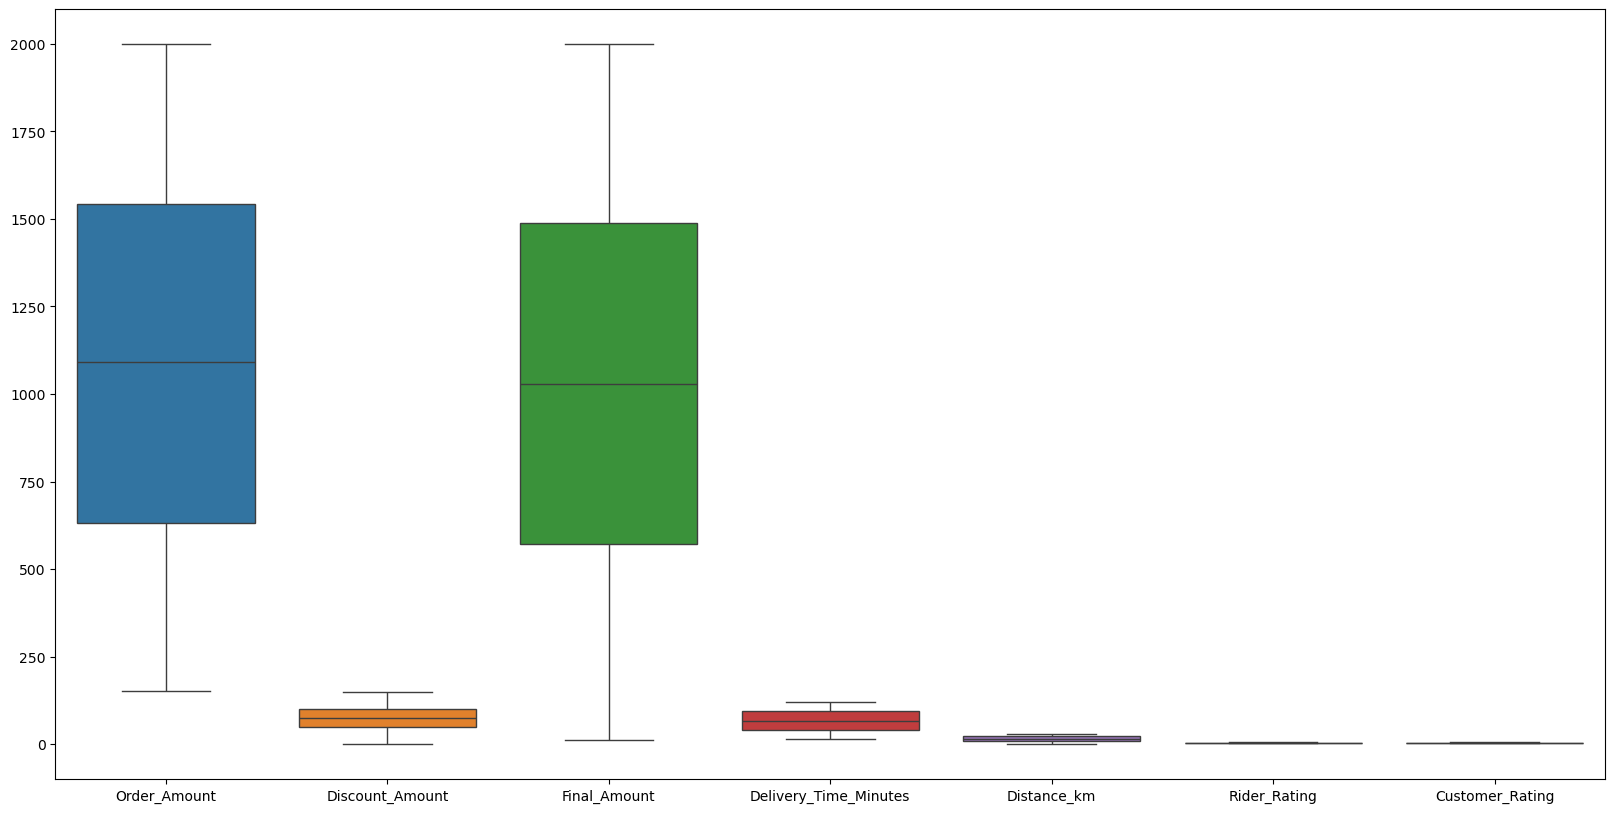

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.boxplot([df1["Order_Amount"],df1["Discount_Amount"],df1["Final_Amount"],df1["Delivery_Time_Minutes"],df1["Distance_km"],df1["Rider_Rating"],df1["Customer_Rating"]])
plt.show()

# DATA AGGREGATION

### City wise Order

In [24]:
a=pd.DataFrame(df.groupby("City")["Order_ID"].count())
a

,Order_ID
City,
Bangalore,349
Chennai,366
Delhi,330
Hyderabad,301
Mumbai,321
Pune,333


In [25]:
a.to_csv("City Order.csv")

In [26]:
import os
os.getcwd()

'C:\\Users\\Eshwari Racha\\Teks'

In [27]:
b=pd.DataFrame(df.groupby("Cuisine_Type")["Order_ID"].count().sort_values(ascending=False))
b

,Order_ID
Cuisine_Type,
Italian,414
Chinese,413
Fast Food,398
Japanese,393
Indian,382


In [28]:
b.to_csv("Cuisine_order.csv")

In [29]:
c=pd.DataFrame(df.groupby("Restaurant_Name")["Customer_Rating"].mean().sort_values())
c

,Customer_Rating
Restaurant_Name,
Burger Town,3.431897
Sushi Spot,3.445627
Food Factory,3.466245
Curry Kingdom,3.489558
Pizza Palace,3.501103
Urban Tandoor,3.529918
Spice Hub,3.546614
Biryani House,3.550397


In [30]:
c.to_csv("Restaurant_Rating.csv")

In [31]:
d=pd.DataFrame(df["Restaurant_Name"].value_counts().head())
d

,count
Restaurant_Name,
Pizza Palace,272
Sushi Spot,263
Biryani House,252
Spice Hub,251
Curry Kingdom,249


In [32]:
d.to_csv("Restaurant_Order.csv")

In [33]:
e=pd.DataFrame(df.groupby("Payment_Method")["Order_ID"].count())
e

,Order_ID
Payment_Method,
Card,494
Cash,491
UPI,496
Wallet,519


In [34]:
e.to_csv("Payment_Method.csv")

In [35]:
f=pd.DataFrame(df.groupby("Order_Status")["Order_ID"].count())
f

,Order_ID
Order_Status,
Cancelled,675
Delayed,660
Delivered,665


In [36]:
f.to_csv("Order_Status.csv")

In [37]:
f

,Order_ID
Order_Status,
Cancelled,675
Delayed,660
Delivered,665
